In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [192]:
dict_files = {'df1': 'Alternative Fuel Vehicles US.csv', 'df2':'ElectricCarData_Clean.csv', 'df3':'taxi+_zone_lookup.csv', 'df4': 'taxi_zones.csv'}

### EDA archivo: **Alternative Fuel Vehicles US.csv**

Se presume se tienen datos pertenecientes a la **EIA** (Administración de Información de energía), donde se tienen datos de encuesta sobre la cantidad de vehículos que usan combustibles alternativos, teniendo en cuenta:

**'Hybrid Electric'**, **'Plug-in Hybrid Electric'**, **'Electric'**, **'Biodiesel (B20)'**, **'Ethanol (E85)'**, **'Hydrogen Fuel Cell'**

In [5]:
df1  = pd.read_csv('./Datasets_clean/' + dict_files['df1'])
df1.head()

,Category,Model,Model Year,Manufacturer,Fuel,All-Electric Range,Alternative Fuel Economy Combined,Conventional Fuel Economy Combined,Transmission Type,Engine Size
0,Sedan/Wagon,NSX,2022,Acura,Hybrid Electric,NaN,NaN,21.0,Automatic,3.5L
1,Sedan/Wagon,A3,2022,Audi,Hybrid Electric,NaN,NaN,32.0,Automatic,2.0L
2,Sedan/Wagon,A3 quattro,2022,Audi,Hybrid Electric,NaN,NaN,31.0,Automatic,2.0L
3,Sedan/Wagon,A4 allroad quattro,2022,Audi,Hybrid Electric,NaN,NaN,26.0,Automatic,2.0L
4,Sedan/Wagon,A4 quattro,2022,Audi,Hybrid Electric,NaN,NaN,29.0,Automatic,2.0L


C:\Users\Gaston Luna Paez\AppData\Local\Temp\ipykernel_20616\949073018.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(model_year, bins=5, kde=False, palette='colorblind')


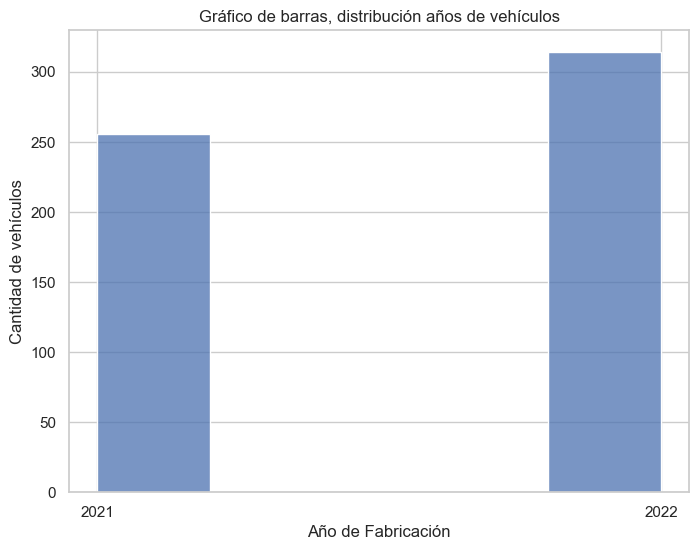

In [28]:
# Crear el gráfico de barras utilizando Seaborn
sns.set(style="whitegrid") 
plt.figure(figsize=(8, 6))

model_year = df1['Model Year'].astype(int)
sns.histplot(model_year, bins=5, kde=False, palette='colorblind')

# Agregar título y etiquetas
plt.title("Gráfico de barras, distribución años de vehículos")
plt.xlabel("Año de Fabricación")
plt.ylabel("Cantidad de vehículos")
plt.xticks(range(int(min(model_year)), int(max(model_year)) + 1))


# Mostrar el gráfico
plt.show()

Se puede observar que los autos se concentran en modelos más nuevos. 

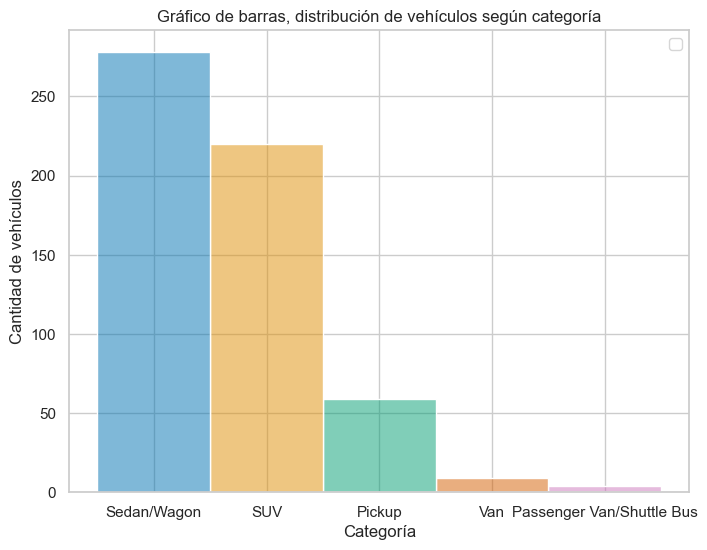

In [69]:
# Crear el gráfico de barras utilizando Seaborn
sns.set(style="whitegrid") 
plt.figure(figsize=(8, 6))

sns.histplot(data = df1, x = 'Category', hue = 'Category', kde=False, palette='colorblind')

# Agregar título y etiquetas
plt.title("Gráfico de barras, distribución de vehículos según categoría")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de vehículos")
plt.legend([])

# Mostrar el gráfico
plt.show()

Se puede observar que la mayoría de los vehículos que se tienen son vehículos normales del tipo **Sedan/Wagon**. Lo que tiene sentido dado que poseen un número de asientos normal además de un buen espacio de almacenamiento de equipaje. A su vez es más fácil obtener la licencia.

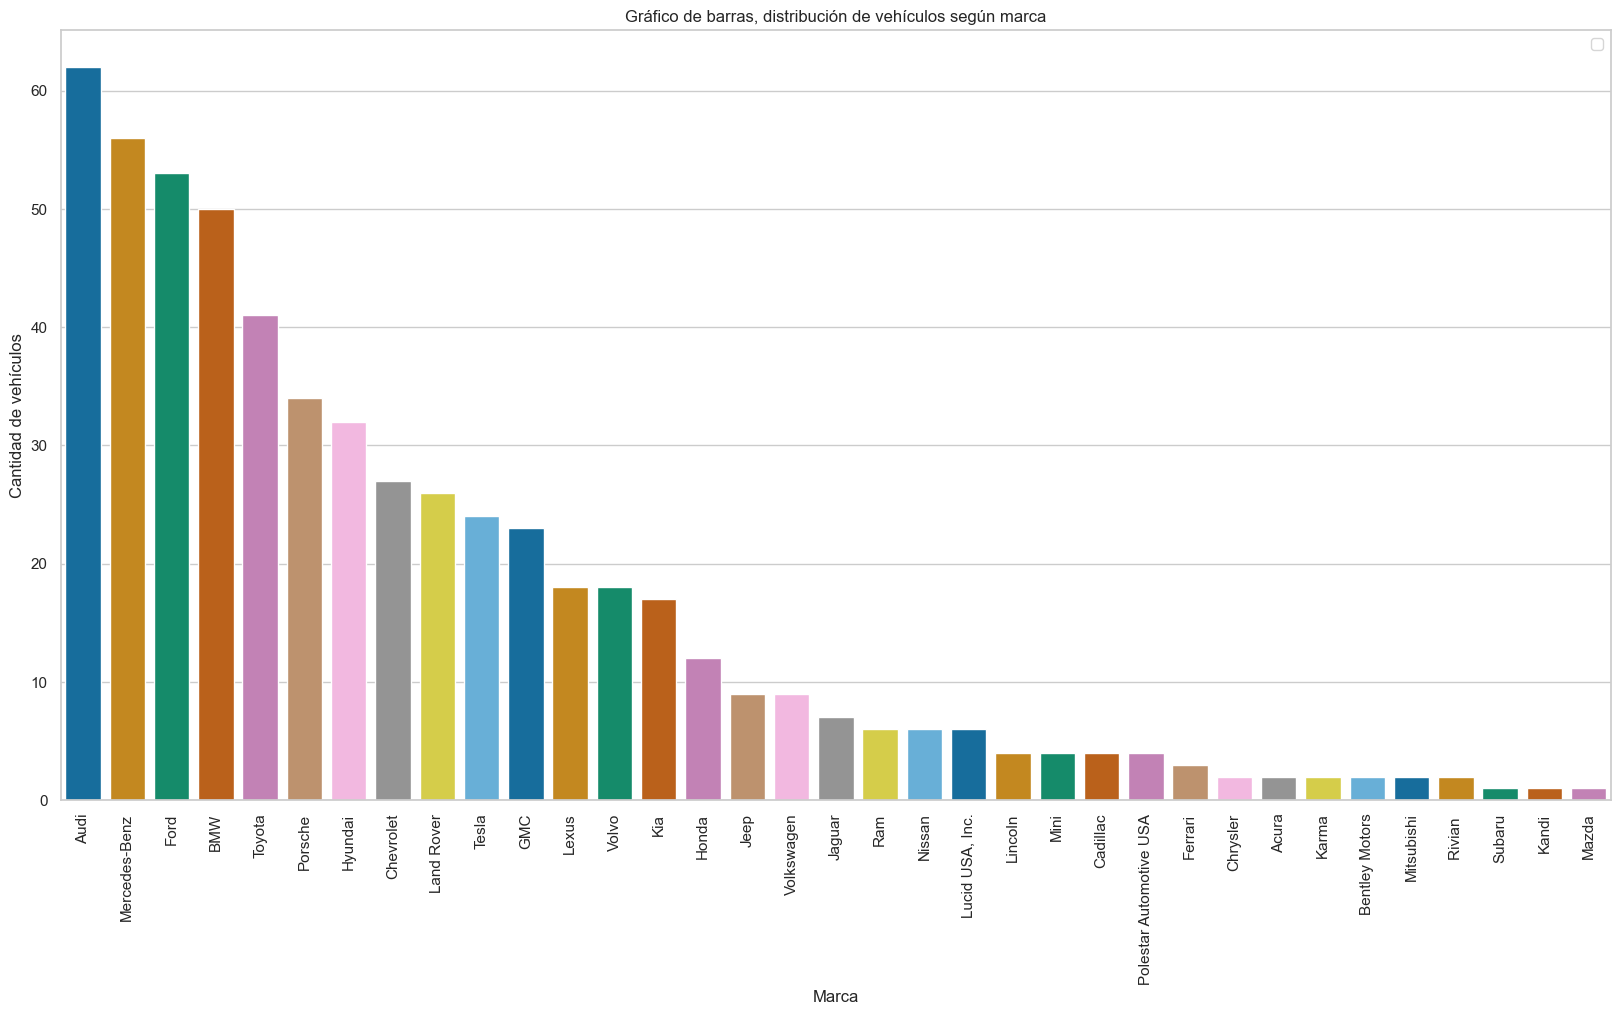

In [78]:
# Crear el gráfico de barras utilizando Seaborn
sns.set(style="whitegrid") 
plt.figure(figsize=(20, 10))


counts_by_manufact = df1['Manufacturer'].value_counts()

# Ordenar las marcas por la cantidad de vehículos en orden descendente
sorted_manufacturers = counts_by_manufact.sort_values(ascending=False).index

sns.barplot(x=sorted_manufacturers, y=counts_by_manufact.values, palette='colorblind')

# Agregar título y etiquetas
plt.title("Gráfico de barras, distribución de vehículos según marca")
plt.xlabel("Marca")
plt.ylabel("Cantidad de vehículos")
plt.xticks(rotation=90)
plt.legend([])
# Mostrar el gráfico
plt.show()

Se puede apreciar que la mayoría de vehículos son de Marca **Audi** seguido por **Mercedez Benz**, **Ford** y **BMW**, mostrando una preferencia por autos de origen Alemán, todos con fama de buen funcionamiento y motores de alto rendimiento en potencia, además de ser marcas muy reconocidas a nivel mundial, de alto poder adquisitivo y con la posibilidad de invertir en estas alternativas de motores

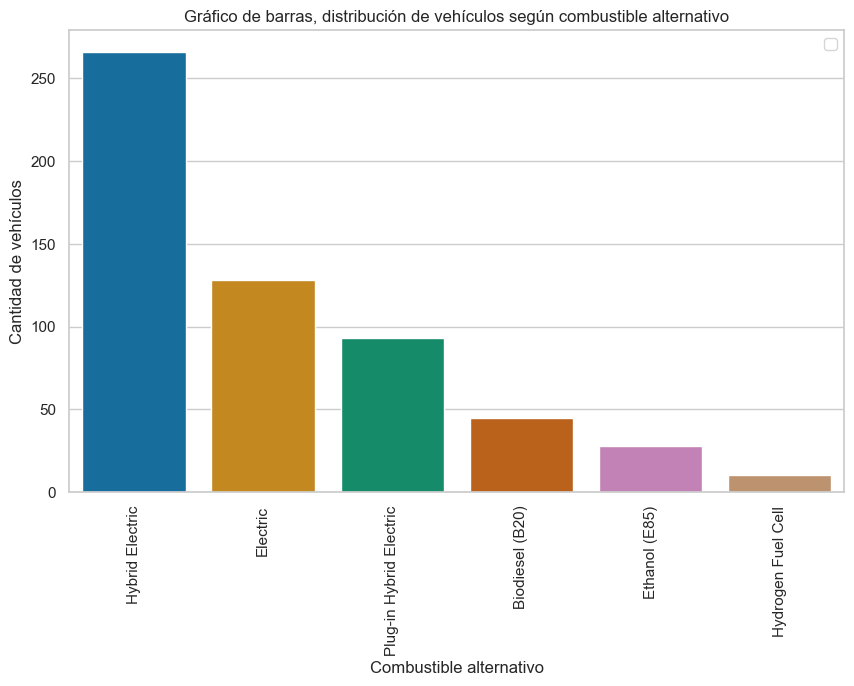

In [89]:
# Crear el gráfico de barras utilizando Seaborn
sns.set(style="whitegrid") 
plt.figure(figsize=(10, 6))


counts_by_fuel= df1['Fuel'].value_counts()

# Ordenar las marcas por la cantidad de vehículos en orden descendente
sorted_fuel = counts_by_fuel.sort_values(ascending=False).index

sns.barplot(x=sorted_fuel, y=counts_by_fuel.values, palette='colorblind')

# Agregar título y etiquetas
plt.title("Gráfico de barras, distribución de vehículos según combustible alternativo")
plt.xlabel("Combustible alternativo")
plt.ylabel("Cantidad de vehículos")
plt.xticks(rotation=90)
plt.legend([])
# Mostrar el gráfico
plt.show()

En comparación con los demás, los vehículos híbridos (**Hybrid Electric**) se destacan por el resto, notando el arraigo de la sociedad a desprenderse del uso del petroleo, ya sea por comodidad, potencia, fidelidad, etc.

In [97]:
df1['Transmission Type'] = df1['Transmission Type'].apply(lambda x: 'Manual' if pd.isnull(x) else x)

In [98]:
df1['Transmission Type'].unique()

array(['Automatic', 'Manual'], dtype=object)

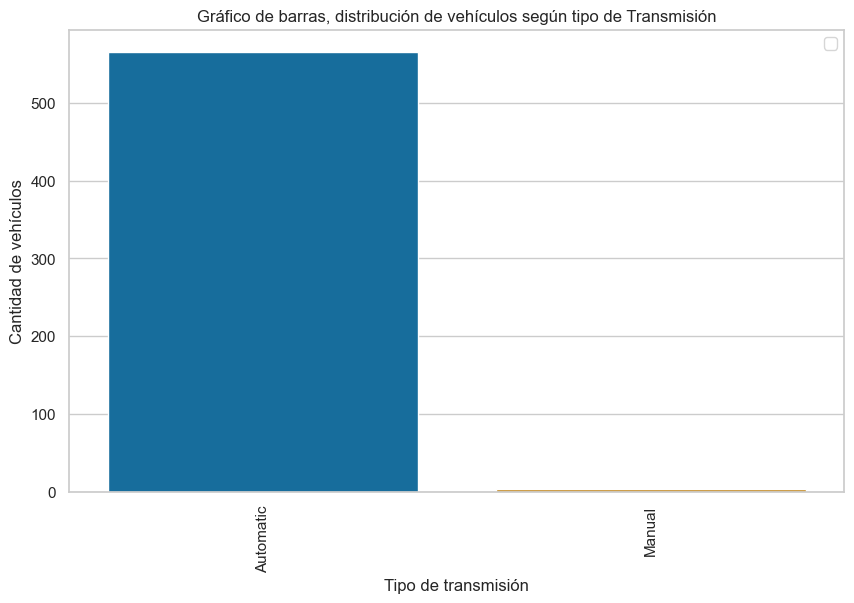

In [99]:
# Crear el gráfico de barras utilizando Seaborn
sns.set(style="whitegrid") 
plt.figure(figsize=(10, 6))


counts_by_transmission= df1['Transmission Type'].value_counts()

# Ordenar las marcas por la cantidad de vehículos en orden descendente
sorted_transmission = counts_by_transmission.sort_values(ascending=False).index

sns.barplot(x=sorted_transmission, y=counts_by_transmission.values, palette='colorblind')

# Agregar título y etiquetas
plt.title("Gráfico de barras, distribución de vehículos según tipo de Transmisión")
plt.xlabel("Tipo de transmisión")
plt.ylabel("Cantidad de vehículos")
plt.xticks(rotation=90)
plt.legend([])
# Mostrar el gráfico
plt.show()

Se casteo a **Manual** todos aquellos nulos, si bien esto no es precisamente correcto, los datos obligados a tomar el tipo **Manual** son pocos y esto es meramente para análisis. Al parecer casi la totalidad de vehículos son de tipo automático, esto va de la mano con disminuir el consumo evitando conducción agresiva que conlleve a mayor consumo y deterioro acelerado de los motores.

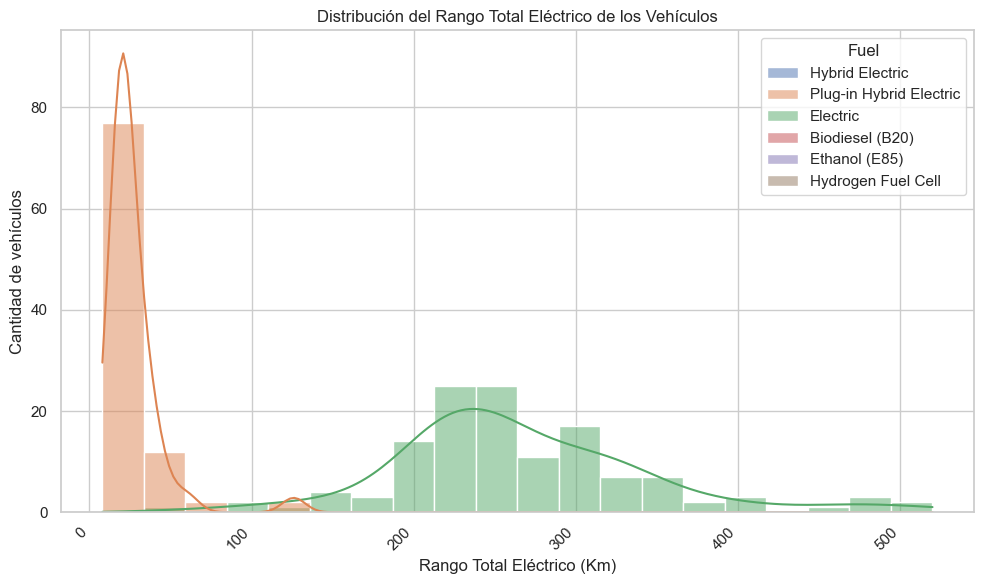

In [111]:


sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.histplot(x = 'All-Electric Range', data=df1, hue = 'Fuel', bins=20, kde=True, color='blue')

# Agregar título y etiquetas
plt.title("Distribución del Rango Total Eléctrico de los Vehículos")
plt.xlabel("Rango Total Eléctrico (Km)")
plt.ylabel("Cantidad de vehículos")

plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


En cuanto a la distribución del rendimiento en km del sustento eléctrico, para aquellos vehículos de los cuales se tiene información se ve que solo los eléctricos puros (**Electric**)tienen un rendimiento racional. Dado que los **Plug-in Hybrid Electric** aparentemente poseen escaso rendimiento con su sustento eléctrico.

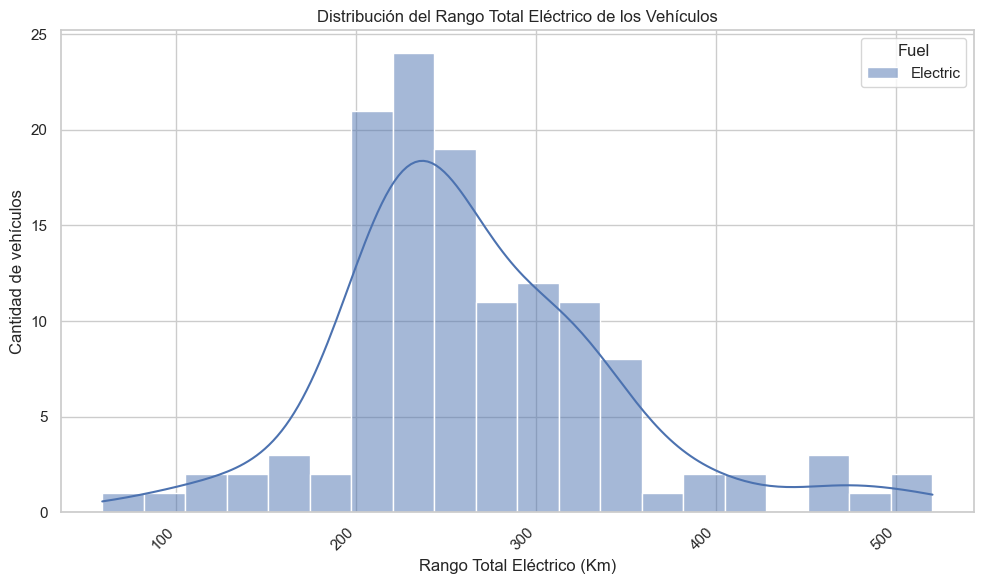

In [115]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.histplot(x = 'All-Electric Range', data=df1[df1['Fuel'] == 'Electric'] , hue = 'Fuel', bins=20, kde=True, color='blue')

# Agregar título y etiquetas
plt.title("Distribución del Rango Total Eléctrico de los Vehículos")
plt.xlabel("Rango Total Eléctrico (Km)")
plt.ylabel("Cantidad de vehículos")

plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


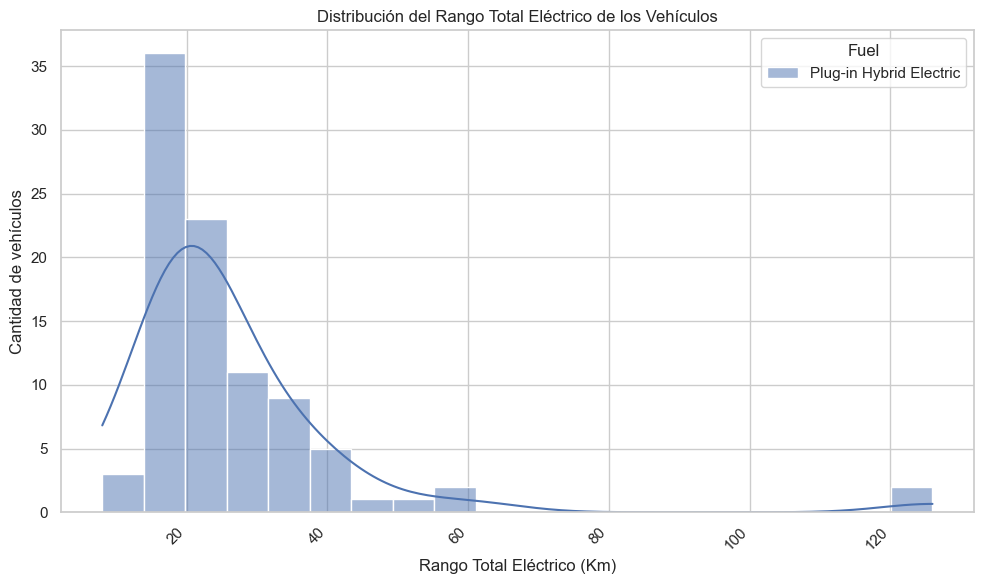

In [121]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.histplot(x = 'All-Electric Range', data=df1[df1['Fuel'] == 'Plug-in Hybrid Electric'] , hue = 'Fuel', bins=20, kde=True, color='blue')

# Agregar título y etiquetas
plt.title("Distribución del Rango Total Eléctrico de los Vehículos")
plt.xlabel("Rango Total Eléctrico (Km)")
plt.ylabel("Cantidad de vehículos")

plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Esto reafirma el análisis anterior. En cuanto al **Hybrid Electric** estándar y a los vehículos de tipo **Hydrogen Fuel Cell** no se tienen datos.

### EDA archivo: **ElectricCarData_Clean.csv**

En esta data contamos con información de autos electricos disponibles para la venta, cuenta con información como precio, marca, modelo, rango en km, eficiencia en uso de energía por km recorridos, tracción, etc.

In [177]:
df2 = pd.read_csv('./Datasets_clean/' + dict_files['df2'] )
df2.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [130]:
df2['Brand'].unique()

array(['Tesla ', 'Volkswagen ', 'Polestar ', 'BMW ', 'Honda ', 'Lucid ',
       'Peugeot ', 'Audi ', 'Mercedes ', 'Nissan ', 'Hyundai ',
       'Porsche ', 'MG ', 'Mini ', 'Opel ', 'Skoda ', 'Volvo ', 'Kia ',
       'Renault ', 'Mazda ', 'Lexus ', 'CUPRA ', 'SEAT ', 'Lightyear ',
       'Aiways ', 'DS ', 'Citroen ', 'Jaguar ', 'Ford ', 'Byton ',
       'Sono ', 'Smart ', 'Fiat '], dtype=object)

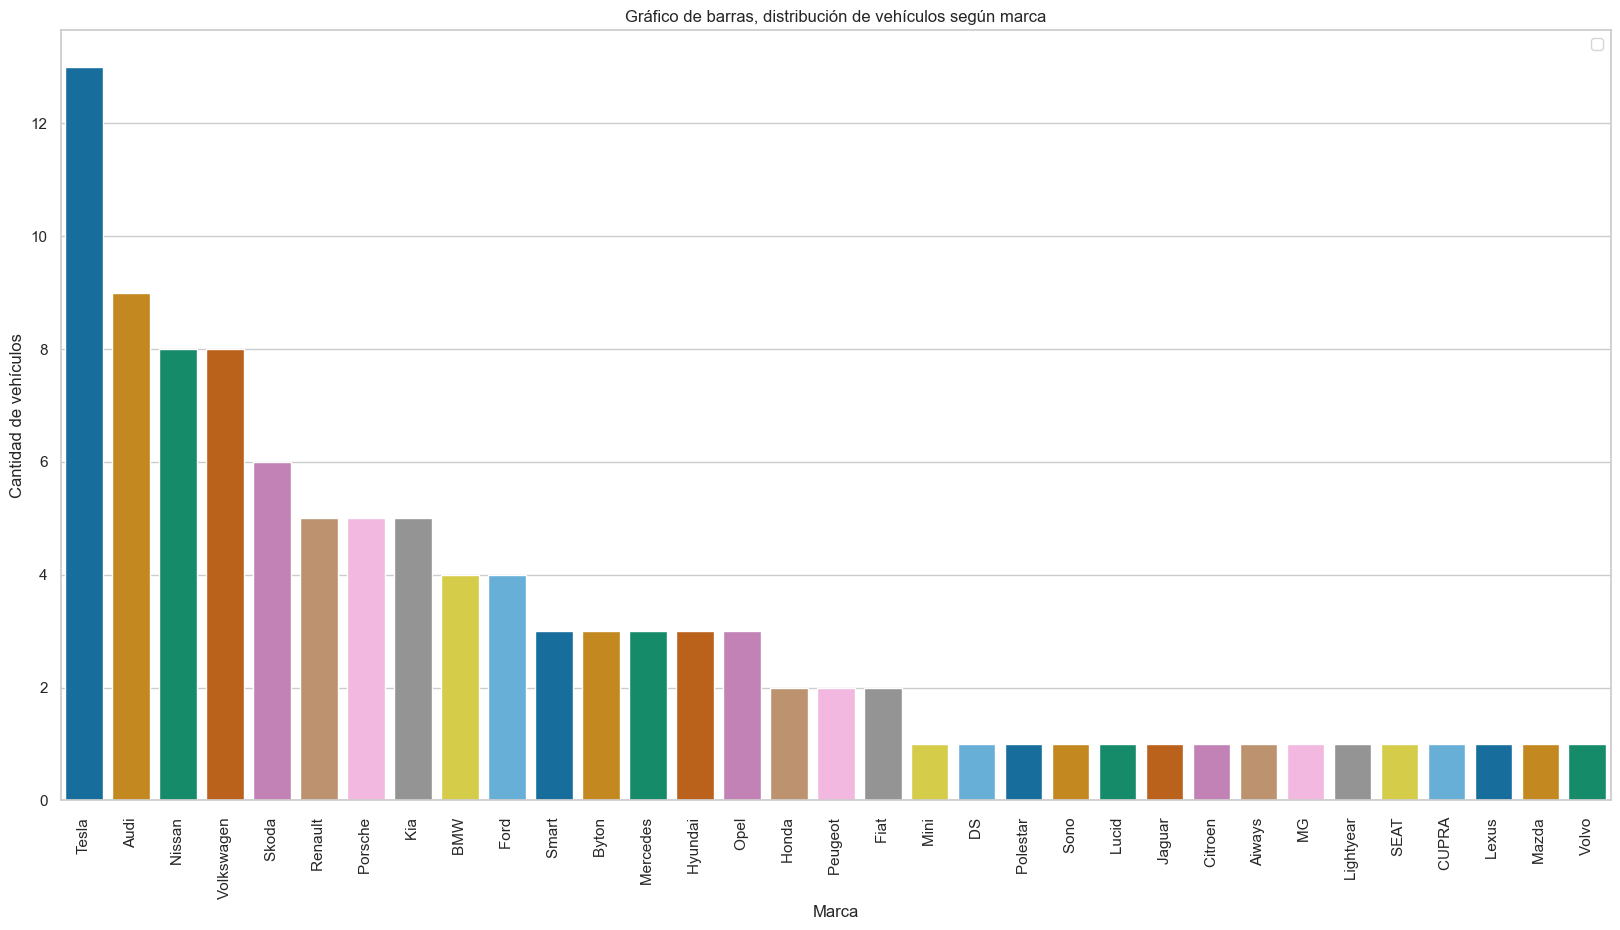

In [131]:
# Crear el gráfico de barras utilizando Seaborn
sns.set(style="whitegrid") 
plt.figure(figsize=(20, 10))


counts_by_manufact = df2['Brand'].value_counts()

# Ordenar las marcas por la cantidad de vehículos en orden descendente
sorted_manufacturers = counts_by_manufact.sort_values(ascending=False).index

sns.barplot(x=sorted_manufacturers, y=counts_by_manufact.values, palette='colorblind')

# Agregar título y etiquetas
plt.title("Gráfico de barras, distribución de vehículos según marca")
plt.xlabel("Marca")
plt.ylabel("Cantidad de vehículos")
plt.xticks(rotation=90)
plt.legend([])
# Mostrar el gráfico
plt.show()

Se destaca la cantidad de vehículos eléctricos disponibles de marca Tesla, lo que tiene sentido dado que se dedican a esto exclusivamente.

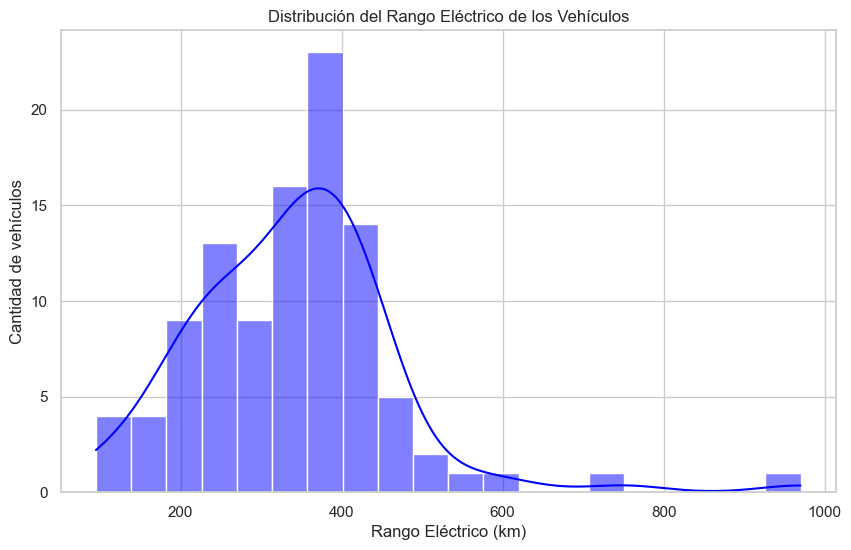

In [140]:
sns.set(style="whitegrid")

# Establece el tamaño de la figura
plt.figure(figsize=(10, 6))

range_km = df2['Range_Km']

# Crear el histograma para analizar la distribución de los valores
sns.histplot(range_km, bins=20, kde=True, color='blue')

# Agregar título y etiquetas
plt.title("Distribución del Rango Eléctrico de los Vehículos")
plt.xlabel("Rango Eléctrico (km)")
plt.ylabel("Cantidad de vehículos")

# Mostrar el gráfico
plt.show()

El rango de duración tiene una media de casi 400km de economía por carga. Sin embargo algunos estan por debajo y otros por encima. Al final de la gráfica se puede observar lo que debería ser un **outliers**

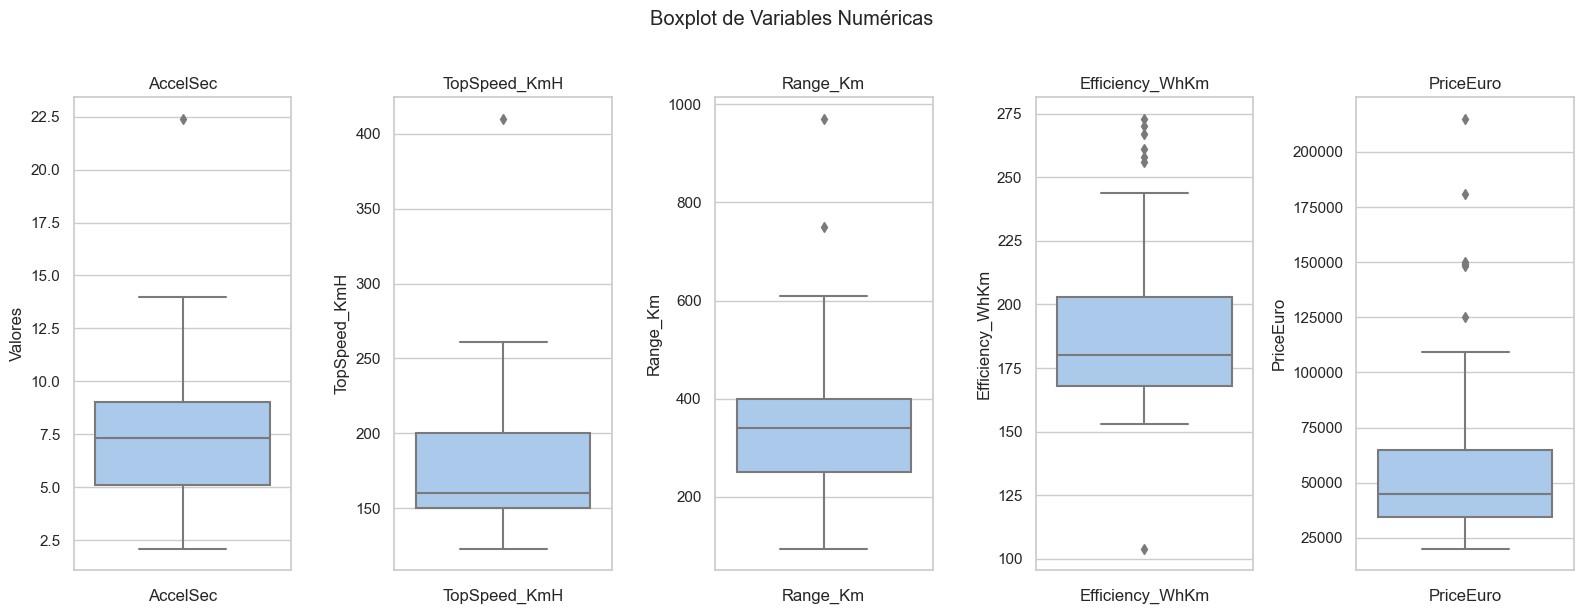

In [158]:
sns.set(style="whitegrid")

# Seleccionar las columnas numéricas para el boxplot
numeric_columns = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'PriceEuro']


# Establecer el tamaño de la figura y crear subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(16, 6), sharey=False)

# Crear un boxplot para cada variable en su subplot correspondiente
for idx, col in enumerate(numeric_columns):
    sns.boxplot(data=df2, y=col, ax=axes[idx], palette='pastel')
    axes[idx].set_title(col)
    axes[idx].set_xlabel(col)

# Agregar título y etiquetas
fig.suptitle("Boxplot de Variables Numéricas", y=1.02)
axes[0].set_ylabel("Valores")

# Ajustar la inclinación de las etiquetas del eje x para mejorar la legibilidad
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Podemos observar que el precio medio es cercano a los 40000 euros con algunas excepciones, además se observa una rango de km bastante compactado, dejando a la vista lo que podrían ser algunos **outliers**. Además se ve una velocidad máxima con una media razonable y algún súper auto o súper outlier que alcanza más de los 400 km/h

C:\Users\Gaston Luna Paez\AppData\Local\Temp\ipykernel_20616\4009354438.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = 'Seats', bins=5, kde=False, palette='pastel', data=df2)


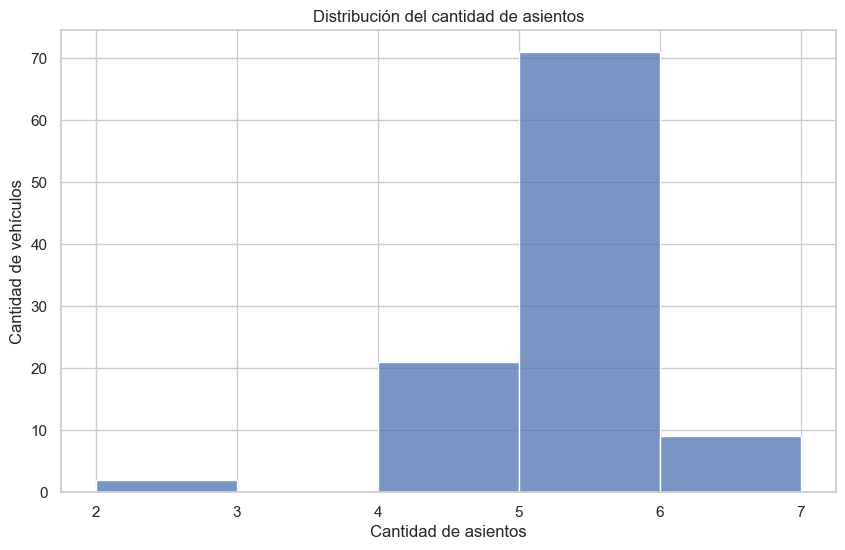

In [159]:
sns.set(style="whitegrid")

# Establece el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el histograma para analizar la distribución de los valores
sns.histplot(x = 'Seats', bins=5, kde=False, palette='pastel', data=df2)

# Agregar título y etiquetas
plt.title("Distribución del cantidad de asientos")
plt.xlabel("Cantidad de asientos")
plt.ylabel("Cantidad de vehículos")

# Mostrar el gráfico
plt.show()

Esto es importante a la hora de tener en cuenta en que vehíuclos invertir, dado que si la empresa es de transporte, le conviene tener al menos 5 plazas pensando en el conductor y una familia tipo de 4 personas. A la vez, algunos de más asientos pueden ser igual de útiles si el rendimiento, consumo y costo es acorde. Además de si existen numerosos viajes con 5 o más pasajeros.

C:\Users\Gaston Luna Paez\AppData\Local\Temp\ipykernel_20616\1292633581.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = 'PlugType', kde=False, palette='pastel', data=df2)


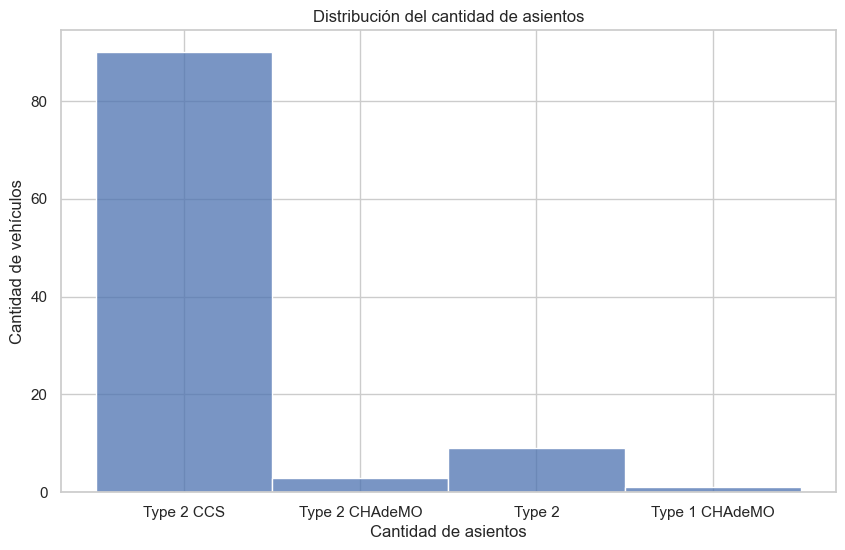

In [160]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.histplot(x = 'PlugType', kde=False, palette='pastel', data=df2)

plt.title("Distribución del cantidad de asientos")
plt.xlabel("Cantidad de asientos")
plt.ylabel("Cantidad de vehículos")

# Mostrar el gráfico
plt.show()

En cuanto a tipo de conexión nos encontramos con 4 tipos, siendo el más común el type 2 CCS, a tener en cuenta las estaciones de carga para su implementación, o existencia de adaptadores.

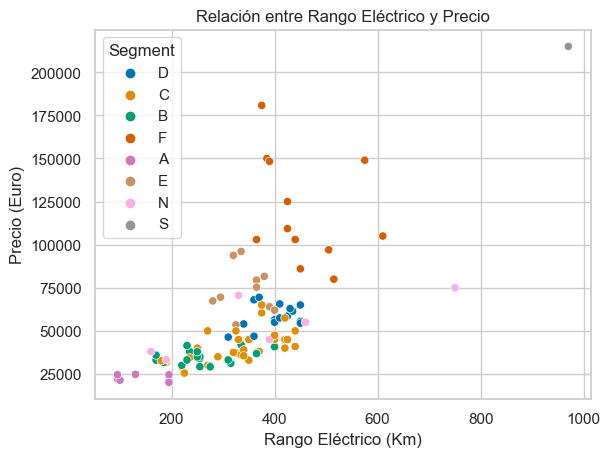

In [168]:
# Relación entre Range_Km y PriceEuro, segmento
sns.scatterplot(data=df2, x='Range_Km', y='PriceEuro', hue = 'Segment', palette='colorblind')
plt.title("Relación entre Rango Eléctrico y Precio")
plt.xlabel("Rango Eléctrico (Km)")
plt.ylabel("Precio (Euro)")
plt.show()


Se presenta lo que parece una correlación positiva entre el precio y el rendimiento en km.Lo cual tiene sentido, además esto demuestra que el rendimiento de 1000 km observado se correlaciona con un precio de 200 000 euros, lo que tiene sentido, en cuanto a segmento es un S, que se corresponde a súper deportivo.

Otra tendencia que se nota es la correspondencia a su vez del tipo de segmento, donde los mejores rendimientos y mayores precios van ded la mano con el segmento, notese el F que se refiere a sedanes de lujo y S que son los súper deportivos. En cuanto a los del segmento A son los más económicos, pequeños y de menor rendimiento.

Para destacar en este punto tenemos en el área central a vehículos de rendimiento al rededor de los 400 km y 60 000 euros, correspondientes al segmento C(compactos de 5 pasajeros) y D(Segmento mejorado en espacio, rendimiento y confort, con un precio un poco más elevado).

En cuanto al segmento A y B ocupan un rango razonable de rendimiento y precio, donde se debe mirar con más énfasis los de tipo B dado su mayor tamaño.

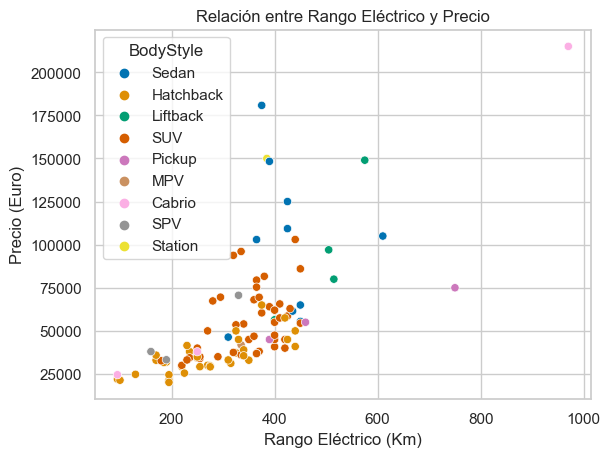

In [169]:
# Relación entre Range_Km y PriceEuro, bodystyle
sns.scatterplot(data=df2, x='Range_Km', y='PriceEuro', hue = 'BodyStyle', palette='colorblind')
plt.title("Relación entre Rango Eléctrico y Precio")
plt.xlabel("Rango Eléctrico (Km)")
plt.ylabel("Precio (Euro)")
plt.show()

Si tenemos en cuenta el formato o **Body Style** no se nota tanto la clusterización por precio y rango, sin embargo se destaca la presciencia del estilo **hatchback**

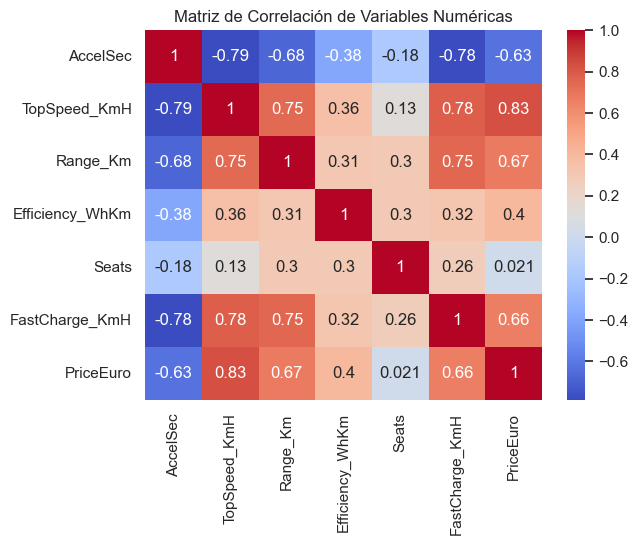

In [178]:
# Calcular la matriz de correlación
numeric_columns = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'Seats','FastCharge_KmH','PriceEuro']

correlation_matrix = df2[numeric_columns].corr()

# Crear un mapa de calor para la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()


Además de lo anterior se observa que además del rango en km existe una correlación de la velocidad máxima alcanzada y el precio, situación similar ocurre en el la velocidad de carga medida en km/h  yen la eficiencia pero a menor escala.

C:\Users\Gaston Luna Paez\AppData\Local\Temp\ipykernel_20616\2748450825.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = 'PowerTrain', kde=False, palette='pastel', data=df2)


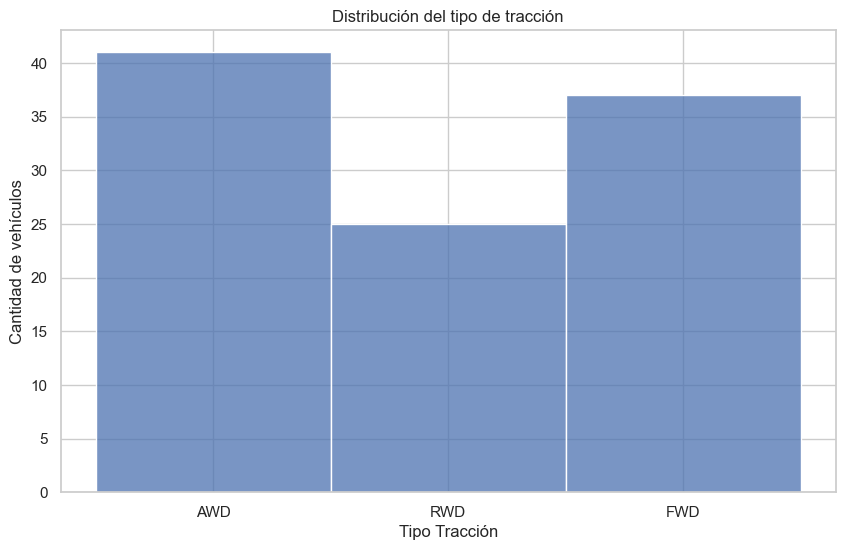

In [170]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.histplot(x = 'PowerTrain', kde=False, palette='pastel', data=df2)

plt.title("Distribución del tipo de tracción")
plt.xlabel("Tipo Tracción")
plt.ylabel("Cantidad de vehículos")

# Mostrar el gráfico
plt.show()

Se ve una tendencia a las tracciones integrales a la vez que se mantiene el común denominador de las tracciones delanteras. Sin embargo la tracción trasera no esta muy por debajo en disponibilidad.

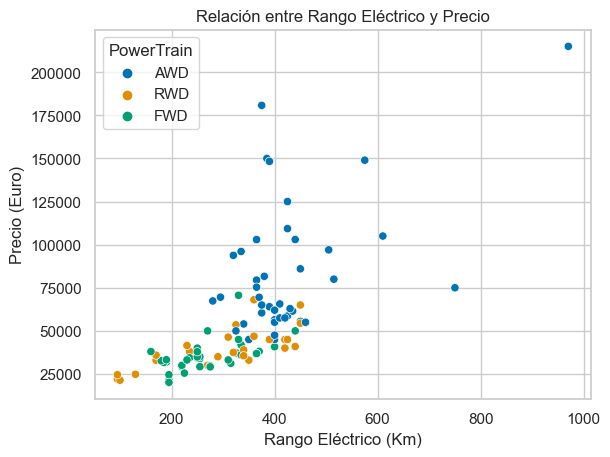

In [171]:
# Relación entre Range_Km y PriceEuro, PowerTrain
sns.scatterplot(data=df2, x='Range_Km', y='PriceEuro', hue = 'PowerTrain', palette='colorblind')
plt.title("Relación entre Rango Eléctrico y Precio")
plt.xlabel("Rango Eléctrico (Km)")
plt.ylabel("Precio (Euro)")
plt.show()

Como era de esperarse los vehículos con tracción integral (**AWD**: All Wheel Drive) son más costosos pero también tienen mejor rango de rendimiento, dado que el costo va de la mano con esta característica. Por otro lado los vehículos de tracción simple ya sea trasera (**RWD**: Rear Wheel Drive) o delantera (**FWD**: Front Wheel Drive) se concentran en los precios y rendimientos medios y bajos. Estando los más económicos y menos eficientes en el grupo de tracción trasera.

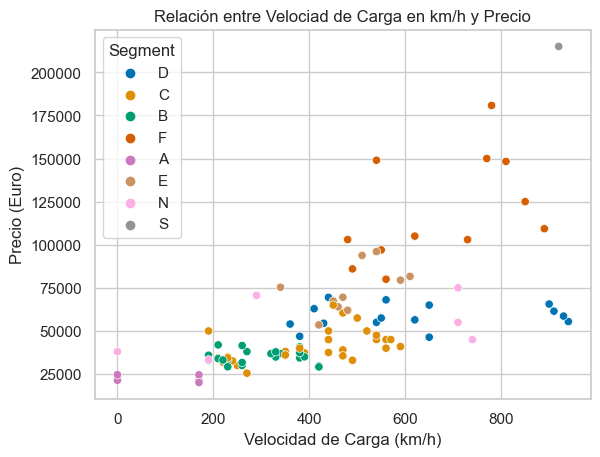

In [183]:
# Relación entre FastCharge_KmH y PriceEuro, SEgment
sns.scatterplot(data=df2, x='FastCharge_KmH', y='PriceEuro', hue = 'Segment', palette='colorblind')
plt.title("Relación entre Velociad de Carga en km/h y Precio")
plt.xlabel("Velocidad de Carga (km/h)")
plt.ylabel("Precio (Euro)")
plt.show()

La situación anterior se repite si ahora en vez de rango de rendimiento en Km empleamos la velocidad de carga en km/h, se nota que a medida que este parametro mejora, también así el precio. En cuanto al segmento la distribución se correlaciona con los precios como se remarco anteriormente.

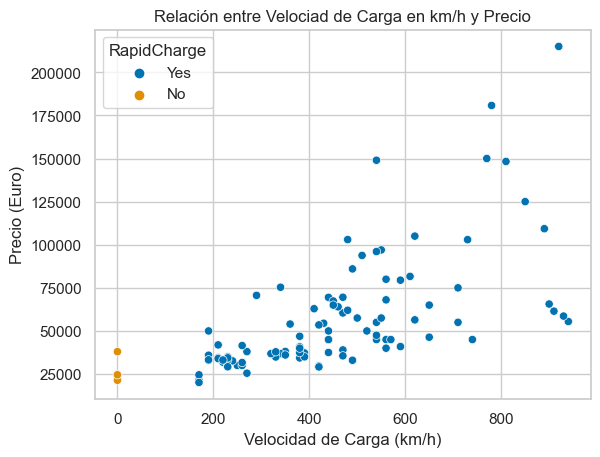

In [188]:
# Relación entre FastCharge_KmH y PriceEuro, SEgment
sns.scatterplot(data=df2, x='FastCharge_KmH', y='PriceEuro', hue = 'RapidCharge', palette='colorblind')
plt.title("Relación entre Velociad de Carga en km/h y Precio")
plt.xlabel("Velocidad de Carga (km/h)")
plt.ylabel("Precio (Euro)")
plt.show()

El último punto a analizar es la disponibilidad de carga rápida, donde claramente se ve que dicha variable ya es un estándar en los vehículos en circulación.